<a href="https://colab.research.google.com/github/Adarsh-8724/first-demo/blob/main/Student_Stress_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import pandas as pd
from google.colab import files

print("Please upload the 'student_stress_data.csv' file.")
uploaded = files.upload()

# After uploading 'student_stress_data.csv', uncomment the following lines to load and display the data:
data = pd.read_csv("student_stress_data.csv")
data.head()

Please upload the 'student_stress_data.csv' file.


Saving student_stress_data.csv to student_stress_data (3).csv


,Age,Gender,Study_Hours,Sleep_Hours,Screen_Time,Attendance,Assigment_Pressure,Exam_Pressure,Physical_Activity,Stress_level
0,20,Male,4,2,3,55,5,1,4,High
1,21,Female,5,5,4,95,3,5,6,Medium
2,19,Male,6,8,8,85,4,5,1,High
3,22,Female,1,3,9,80,5,4,2,Low
4,21,Male,4,4,7,75,5,3,4,High


In [20]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 8 non-null      int64 
 1   Gender              8 non-null      object
 2   Study_Hours         8 non-null      int64 
 3   Sleep_Hours         8 non-null      int64 
 4   Screen_Time         8 non-null      int64 
 5   Attendance          8 non-null      int64 
 6   Assigment_Pressure  8 non-null      int64 
 7   Exam_Pressure       8 non-null      int64 
 8   Physical_Activity   8 non-null      int64 
 9   Stress_level        8 non-null      object
dtypes: int64(8), object(2)
memory usage: 772.0+ bytes


,Age,Study_Hours,Sleep_Hours,Screen_Time,Attendance,Assigment_Pressure,Exam_Pressure,Physical_Activity
count,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,20.625000,4.250000,3.87500,7.375000,77.750000,3.500000,3.500000,2.750000
std,1.407886,1.488048,1.95941,2.875388,13.057565,1.511858,1.511858,1.908627
min,19.000000,1.000000,2.00000,3.000000,55.000000,1.000000,1.000000,0.000000
25%,19.750000,4.000000,2.75000,6.250000,72.500000,2.750000,2.750000,1.750000
50%,20.500000,4.500000,3.50000,7.500000,78.500000,3.500000,3.500000,2.500000
75%,21.250000,5.000000,4.25000,9.000000,86.250000,5.000000,5.000000,4.000000
max,23.000000,6.000000,8.00000,12.000000,95.000000,5.000000,5.000000,6.000000


“This step helps me understand data types and missing values.”

In [21]:
data.isnull().sum()


,0
Age,0
Gender,0
Study_Hours,0
Sleep_Hours,0
Screen_Time,0
Attendance,0
Assigment_Pressure,0
Exam_Pressure,0
Physical_Activity,0
Stress_level,0


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

data.head()


,Age,Gender,Study_Hours,Sleep_Hours,Screen_Time,Attendance,Assigment_Pressure,Exam_Pressure,Physical_Activity,Stress_level
0,1,1,1,0,0,0,4,0,4,0
1,2,0,2,3,1,7,2,4,5,2
2,0,1,3,4,3,5,3,4,1,0
3,3,0,0,1,4,4,4,3,2,1
4,2,1,1,2,2,2,4,2,4,0


“Machine learning models require numerical input, so encoding is required.”

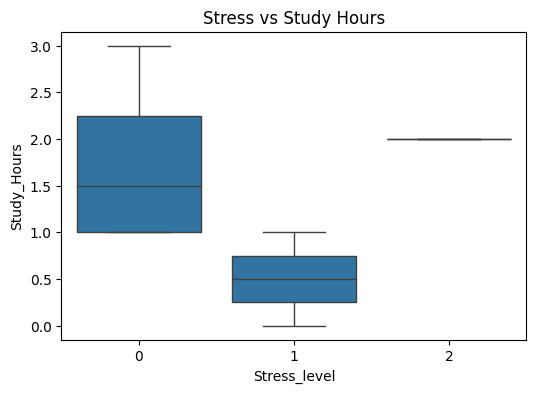

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_level', y='Study_Hours', data=data)
plt.title("Stress vs Study Hours")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop('Stress_level', axis=1)
y = data['Stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.0
[[0 0 0]
 [0 0 0]
 [1 1 0]]


“Accuracy tells how well the model predicts unseen data.”